In [1]:
import matplotlib.pyplot as plt
import matplotlib

import numpy as np

In [2]:
!python --version

Python 3.7.6


In [3]:
import matplotlib.patches as mpatches

from sklearn.datasets import make_blobs, make_circles

In [6]:
def plot_data(pl, X, y):
    pl.plot(X[y == 0, 0], X[y == 0, 1], 'ob', alpha = 0.5)
    pl.plot(X[y == 1, 0], X[y == 1, 1], 'xr', alpha = 0.5)
    pl.legend(['0', '1'])
    return pl

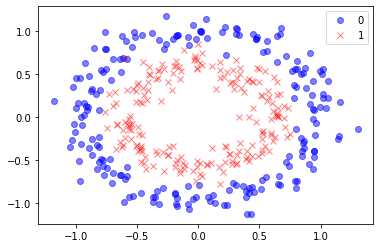

In [7]:
X, y = make_circles(
    n_samples = 400, 
    factor = 0.6, 
    noise = 0.1, 
    random_state = 42
)

pl = plot_data(plt, X, y)
pl.show()

In [8]:
seed = 1

print("X size =", X.shape)
print("y size =", y.shape)
print("Num of Samples =", X.shape[0])

X size = (400, 2)
y size = (400,)
Num of Samples = 400


In [9]:
print(X)

[[ 5.22047667e-01  2.45076964e-01]
 [-4.90174568e-01  4.04540597e-01]
 [ 4.69901235e-01  9.04544287e-01]
 [ 7.37010889e-01  1.11486553e-01]
 [-9.86636209e-01  1.69521513e-01]
 [-7.17008501e-01  4.38359514e-01]
 [-4.41013452e-01 -5.31920699e-01]
 [-9.95858989e-01  1.08030813e-01]
 [-3.25897203e-01  5.41504194e-01]
 [-6.96094447e-01 -6.45797770e-01]
 [ 9.28358178e-01  2.58529455e-01]
 [ 2.30348927e-01 -3.40047801e-01]
 [-2.66141506e-01  1.17464969e+00]
 [-7.55781307e-01  7.93410286e-01]
 [-5.69765424e-01 -9.25855019e-01]
 [ 3.18599125e-01  1.02857282e+00]
 [-5.10432759e-01  1.73074993e-01]
 [ 3.95376430e-01 -3.96807852e-01]
 [ 3.37431388e-01  5.71841873e-01]
 [ 7.27958177e-01 -2.31006816e-01]
 [-6.93334233e-01  6.76130038e-01]
 [ 1.00825010e+00  5.07130501e-01]
 [ 6.51086779e-01  1.35010193e-02]
 [-3.45045802e-01  4.46996781e-01]
 [ 1.04462893e+00  1.13624232e-01]
 [ 6.45411496e-01  3.08639177e-02]
 [-9.71724535e-01 -5.12587714e-01]
 [ 3.69760307e-01  2.97525839e-01]
 [-2.09844774e-01  5

In [10]:
from keras.layers import Dense, Activation
from keras.models import Sequential

np.random.seed(seed)

model = Sequential()

In [11]:
model.add(Dense(1, activation = 'sigmoid', input_dim = 2))
model.compile(optimizer = 'sgd', loss = 'binary_crossentropy')

In [12]:
model.fit(X, y, batch_size = 5, epochs = 100, verbose = 1)

Epoch 1/100
80/80 [==============================] - 0s 698us/step - loss: 0.7206
Epoch 2/100
80/80 [==============================] - 0s 500us/step - loss: 0.7171
Epoch 3/100
80/80 [==============================] - 0s 476us/step - loss: 0.7143
Epoch 4/100
80/80 [==============================] - 0s 487us/step - loss: 0.7116
Epoch 5/100
80/80 [==============================] - 0s 452us/step - loss: 0.7094
Epoch 6/100
80/80 [==============================] - 0s 451us/step - loss: 0.7073
Epoch 7/100
80/80 [==============================] - 0s 427us/step - loss: 0.7056
Epoch 8/100
80/80 [==============================] - 0s 462us/step - loss: 0.7041
Epoch 9/100
80/80 [==============================] - 0s 442us/step - loss: 0.7027
Epoch 10/100
80/80 [==============================] - 0s 445us/step - loss: 0.7015
Epoch 11/100
80/80 [==============================] - 0s 457us/step - loss: 0.7006
Epoch 12/100
80/80 [==============================] - 0s 399us/step - loss: 0.6997
Epoch 13/100


80/80 [==============================] - 0s 440us/step - loss: 0.6935
Epoch 100/100
80/80 [==============================] - 0s 414us/step - loss: 0.6936


In [20]:
matplotlib.rcParams['figure.figsize'] = (6.0, 4.0)

In [29]:
def plot_decision_bound(model, X, y):
    # X shape -> (400, 2)
    # a = x, b = y
    amin, bmin = X.min(axis = 0) - 0.1
    amax, bmax = X.max(axis = 0) + 0.1
    print("amin =", amin)
    print("bmin =", bmin)
    print("amax =", amax)
    print("bmax =", bmax)
    
    hticks = np.linspace(amin, amax, 101)
    vticks = np.linspace(bmin, bmax, 101)
    
    aa, bb = np.meshgrid(hticks, vticks)
    ab = np.c_[aa.ravel(), bb.ravel()]
    
    c = model.predict(ab)
    Z = c.reshape(aa.shape)
    
    plt.contourf(aa, bb, Z, cmap = 'bwr', alpha = 0.2)
    plot_data(plt, X, y)
    return plt

amin = -1.2816529526885447
bmin = -1.222835878671317
amax = 1.405132554307814
bmax = 1.2746496919432166


Text(0.5, 1.0, 'Logistic Regression')

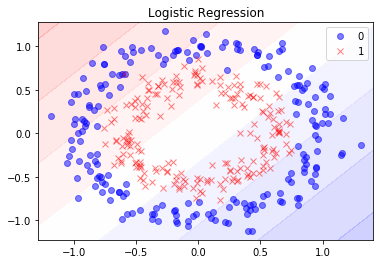

In [30]:
plot_decision_bound(model, X, y)
plt.title("Logistic Regression")